## ELDEN RING (WEAPONS) - EXPLORATORY DATA ANALYSIS 

<img src="https://static.bandainamcoent.eu/high/elden-ring/elden-ring/00-page-setup/elden-ring-new-header-mobile.jpg" />

## ABOUT

Hello, this project is for Fromsoftware fans, people interested in playing Elden Ring and open world games, especially those who want to build a character with physical strength or dexterity as their main ability, also search through the data and see the relationships or insights we can find.

## RESOURCES OF THE DATASETS USED IN THIS PROJECT

### <li><strong> (contains all information about the weapons in Elden Ring)</strong> -  <a href="https://www.kaggle.com/datasets/l3llff/-elden-ring-weapons?select=elden_ring_weapon.csv">Source</a><br>
The given dataset was taken from the dataset in Kaggle Datasets.
### <li> <strong>elden_ring_weapon.csv-  </strong> -  <a href="https://www.kaggle.com/datasets/l3llff/-elden-ring-weapons/download?datasetVersionNumber=2">Download</a>
    

    

## USED LIBRARIES/PACKAGES IN THIS PROJECT

* __jovian__ (to upload, save and share the contents of my notebook)
* __numpy__ (as np is one of the very famous packages for working with arrays in python)
* __pandas__ (Is greatly used in analysis of data and making dataframe)
* __matplotlib__ (Lets make our Analyzation fun and interative with the visualization library matplotlib)
* __seaborn__ (Adding more colours into matplotlib visualization)

## DATA PREPARATION AND CLEANING



###  Import libraries

In [4]:
import pandas as pd

In [5]:
import matplotlib as mpl

In [6]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
import numpy as np

In [12]:
%matplotlib inline

### Downloading the Dataset

In [13]:
df = pd.read_csv('elden_ring_weapon.csv')

### Handling Null Values

In [14]:
df.isnull().values.any()

False

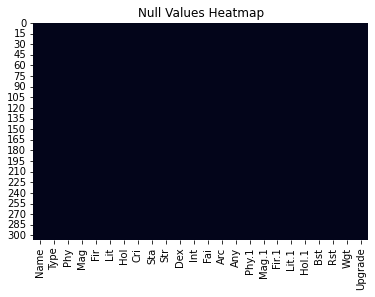

In [15]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [10]:
df.isnull().sum().sort_values(ascending = False)

Name       0
Type       0
Wgt        0
Rst        0
Bst        0
Hol.1      0
Lit.1      0
Fir.1      0
Mag.1      0
Phy.1      0
Any        0
Arc        0
Fai        0
Int        0
Dex        0
Str        0
Sta        0
Cri        0
Hol        0
Lit        0
Fir        0
Mag        0
Phy        0
Upgrade    0
dtype: int64

Above in the heatmap and table, we can see that there are none null values in the dataset. . therre is no need to handle null data points, but there are some (-), so we need to change them for a value 0, then we can dive into EDA and modeling.

In [27]:
df['Phy.1']=df['Phy.1'].replace('-', '0').astype('int')

In [188]:
df['Phy']=df['Phy'].replace('-', '0').astype('int')

In [99]:
df['Str']=df['Str'].replace('N', None  ).astype('object')

In [193]:
df['Dex']=df['Dex'].replace('-', None  ).astype('object')

In [205]:
df['Rst']=df['Rst'].replace('NULL', 0  ).astype('int')

In [204]:
df['Rst'] = df['Rst'].fillna(0)


## EXPLORATORY ANALYSIS AND VISUALIZATION




###  Inspect for data  

In [206]:
df.head(5)

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,None,S,-,-,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,D,D,-,-,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,D,-,-,-,-,0,-,-,-,-,-,0,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,None,B,-,S,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,C,-,-,-,(55),47,31,31,31,31,25,10,3.0,Smithing Stones


In [120]:
df.columns

Index(['Name', 'Type', 'Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Str',
       'Dex', 'Int', 'Fai', 'Arc', 'Any', 'Phy.1', 'Mag.1', 'Fir.1', 'Lit.1',
       'Hol.1', 'Bst', 'Rst', 'Wgt', 'Upgrade'],
      dtype='object')

In [121]:
df.shape

(307, 24)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     307 non-null    object 
 1   Type     307 non-null    object 
 2   Phy      307 non-null    int32  
 3   Mag      307 non-null    object 
 4   Fir      307 non-null    object 
 5   Lit      307 non-null    object 
 6   Hol      307 non-null    object 
 7   Cri      307 non-null    int64  
 8   Sta      307 non-null    int64  
 9   Str      291 non-null    object 
 10  Dex      263 non-null    object 
 11  Int      307 non-null    object 
 12  Fai      307 non-null    object 
 13  Arc      307 non-null    object 
 14  Any      307 non-null    object 
 15  Phy.1    307 non-null    int32  
 16  Mag.1    307 non-null    object 
 17  Fir.1    307 non-null    object 
 18  Lit.1    307 non-null    object 
 19  Hol.1    307 non-null    object 
 20  Bst      307 non-null    object 
 21  Rst      307 non

In [123]:
df.describe()

,Phy,Cri,Sta,Phy.1,Wgt
count,307.000000,307.000000,307.000000,307.000000,307.000000
mean,250.205212,101.169381,105.335505,44.224756,7.123779
std,92.627550,4.421129,41.609782,20.384337,5.194516
min,0.000000,100.000000,38.000000,0.000000,0.000000
25%,203.000000,100.000000,80.000000,31.500000,3.000000
50%,267.000000,100.000000,100.000000,45.000000,5.500000
75%,303.000000,100.000000,128.000000,60.000000,10.000000
max,672.000000,140.000000,224.000000,88.000000,26.500000


In [124]:
pd.set_option('display.max_rows', None)

In [125]:
pd.set_option('display.max_columns', None)

In [207]:
df

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
0,Academy Glintstone Staff,Glintstone Staff,43,-,-,-,-,100,40,D,None,S,-,-,-,25,15,15,15,15,15,10,3.0,Smithing Stones
1,Alabaster Lord's Sword,Greatsword,313,93,-,-,-,100,126,B,D,D,-,-,-,56,33,27,27,27,39,19,8.0,Somber Smithing Stones
2,Albinauric Bow,Bow,200,-,-,-,-,100,60,E,D,-,-,-,-,0,-,-,-,-,-,0,4.5,Smithing Stones
3,Albinauric Staff,Glintstone Staff,29,-,-,-,-,100,38,D,None,B,-,S,-,23,14,14,14,14,14,9,2.5,Smithing Stones
4,Antspur Rapier,Thrusting Sword,240,-,-,-,-,100,62,D,C,-,-,-,(55),47,31,31,31,31,25,10,3.0,Smithing Stones
5,Arbalest,Crossbow,308,-,-,-,-,100,68,None,None,-,-,-,-,0,-,-,-,-,-,0,6.0,Smithing Stones
6,Astrologer's Staff,Glintstone Staff,43,-,-,-,-,100,40,D,None,S,-,-,-,25,15,15,15,15,15,10,3.0,Smithing Stones
7,Axe of Godfrey,Colossal Weapon,404,-,-,-,-,100,150,C,D,-,-,-,-,75,45,45,45,45,50,25,18.0,Somber Smithing Stones
8,Axe of Godrick,Greataxe,347,-,-,-,-,100,150,C,C,-,-,-,-,65,35,35,35,35,42,20,11.0,Somber Smithing Stones
9,Azur's Glintstone Staff,Glintstone Staff,58,-,-,-,-,100,42,C,None,S,-,-,-,25,15,15,15,15,15,10,4.0,Somber Smithing Stones


### styling

In [127]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.figsize'] = (8, 4)
mpl.rcParams['figure.facecolor'] = '#00000000'

## ASKING AND ANSWERING QUESTIONS

### Q1: what is the range of weight of the weapon that is repeated more & which is the heaviest weapon & How much the top 5 weapons weigh ? 

Text(0.5, 1.0, 'Weight of the weapons')

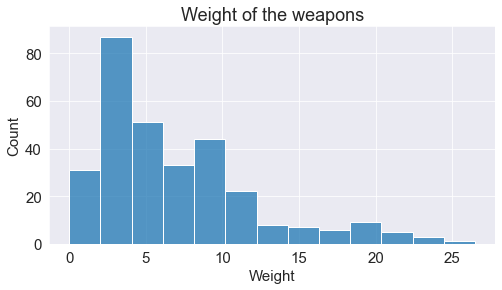

In [128]:
sns.histplot(data=df, x='Wgt')
plt.ylabel("Count")
plt.xlabel("Weight")
plt.title('Weight of the weapons')

Most of the weapons weights are in the range  is between 5  > 0


In [129]:
df[df['Wgt'] == df['Wgt'].max()]

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
116,Giant-Crusher,Colossal Weapon,379,-,-,-,-,100,224,B,None,-,-,-,-,88,52,52,52,52,69,29,26.5,Smithing Stones


The heaviest weapon is the Giant-Crusher


<img src="https://assets.gamepur.com/wp-content/uploads/2022/04/22193303/elden_ring_giant_crusher-1.jpg" />

In [130]:
df_wgt= df.Wgt.sort_values(ascending=False).head(5)


In [131]:
df_wgt.values

array([26.5, 23.5, 23. , 23. , 22. ])

 The heaviest 5 weapons weigh : 26.5, 23.5, 23. , 23. , 22. 


<img src="https://static0.gamerantimages.com/wordpress/wp-content/uploads/2022/03/elden-ring-best-colossal-weapons.jpg" />

There are just a few weapons that weights a sustancial amount compared among the set of weapong, if you want build your character with pyshical streght, you should aim to obtain one of these

### Q2: what is the most repeated physical damage among the upgraded weapons & which weapon make the most damage ? 

Text(0.5, 1.0, 'physical damage')

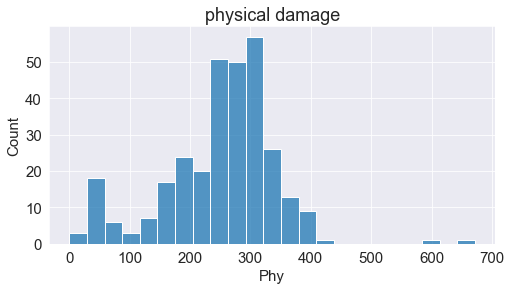

In [132]:
sns.histplot(data=df, x='Phy')
plt.title('physical damage')

The most repeated damage among the improved weapons is around 300


In [133]:
df[df['Phy'] == df['Phy'].max()]

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
167,Jar Cannon,Ballista,672,-,-,-,-,100,180,None,None,-,-,-,-,0,-,-,-,-,-,-,15.0,Somber Smithing Stones


The improved weapon that makes more damage is the Jar Cannon


<img src="https://xboxplay.games/uploadStream/25747.jpg" />

### Q3: What is the group of weapons that have more weapons en compare the other groups & how many katanas there are and which is best? 

In [134]:
df['Type'].unique()

array(['Glintstone Staff', 'Greatsword', 'Bow', 'Thrusting Sword',
       'Crossbow', 'Colossal Weapon', 'Greataxe', 'Curved Sword',
       'Halberd', 'Flail', 'Axe', 'Warhammer', 'Torch',
       'Curved Greatsword', 'Dagger', 'Claw', 'Heavy Thrusting Sword',
       'Spear', 'Straight Sword', 'Fist', 'Sacred Seal', 'Hammer',
       'Light Bow', 'Katana', 'Twinblade', 'Greatbow', 'Whip',
       'Colossal Sword', 'Reaper', 'Ballista', 'Great Spear'],
      dtype=object)

In [135]:
top_types= df.Type.value_counts()

In [136]:
top_types

Straight Sword           21
Greatsword               20
Glintstone Staff         17
Halberd                  16
Spear                    16
Dagger                   16
Hammer                   15
Colossal Weapon          15
Curved Sword             14
Warhammer                14
Axe                      13
Greataxe                 11
Colossal Sword           11
Curved Greatsword         9
Fist                      9
Sacred Seal               9
Katana                    8
Crossbow                  7
Thrusting Sword           7
Bow                       7
Whip                      6
Twinblade                 6
Great Spear               6
Torch                     6
Light Bow                 5
Flail                     5
Heavy Thrusting Sword     4
Greatbow                  4
Reaper                    4
Claw                      4
Ballista                  2
Name: Type, dtype: int64

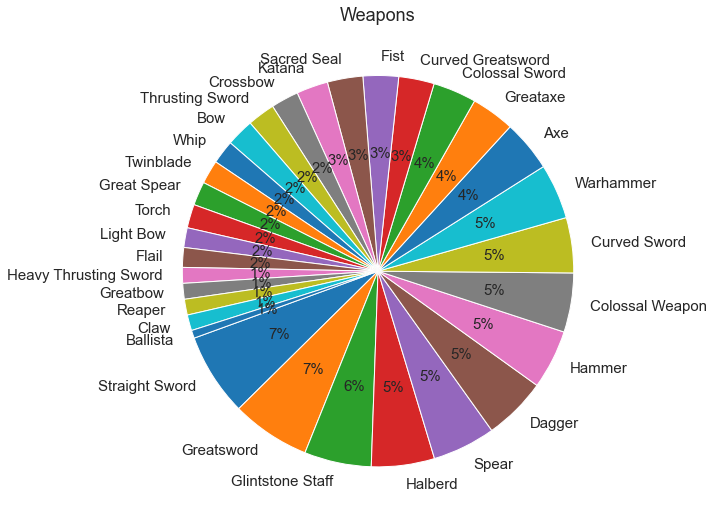

In [137]:
plt.figure(figsize=(16,9))
plt.title("Weapons")
plt.pie(top_types, labels=top_types.index, autopct='%1.f%%', startangle=200);

The group of weapons with the most of them are the straight swords, followed by the gratswords, the glintstone staffs, halberds, and spears.


<img src="https://preview.redd.it/wzpfo60317x81.png?width=1846&format=png&auto=webp&s=150bfce86a263ab2f1cf04a5699e041cdbe650f6" />

In [138]:
top_types['Katana']

8

There are eight types of katana


<img src="https://fictionhorizon.com/wp-content/uploads/2022/06/Elden-Ring-Katana.jpg" />

In [139]:
katanas=df[df['Type'] == 'Katana']
katanas

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
78,Dragonscale Blade,Katana,269,-,-,-,-,100,90,D,B,-,-,-,-,35,25,25,50,25,30,15,5.5,Somber Smithing Stones
151,Hand of Malenia,Katana,286,-,-,-,-,100,90,E,B,-,-,-,(50),49,33,33,33,33,33,16,7.0,Somber Smithing Stones
192,Meteoric Ore Blade,Katana,274,176,-,-,-,100,104,C,D,C,-,-,(50),50,45,31,31,31,33,16,7.5,Somber Smithing Stones
199,Moonveil,Katana,178,213,-,-,-,100,90,E,B,B,-,-,(50),31,57,26,26,26,31,15,6.5,Somber Smithing Stones
202,Nagakiba,Katana,281,-,-,-,-,100,90,D,B,-,-,-,(45),49,33,33,33,33,39,16,7.0,Smithing Stones
230,Rivers of Blood,Katana,186,-,186,-,-,100,90,E,B,-,-,D,(50),36,26,52,26,26,31,15,6.5,Somber Smithing Stones
253,Serpentbone Blade,Katana,294,-,-,-,-,100,84,E,B,-,-,-,(66),45,30,30,30,30,36,15,6.0,Smithing Stones
286,Uchigatana,Katana,281,-,-,-,-,100,90,D,C,-,-,-,(45),45,30,30,30,30,36,15,5.5,Smithing Stones


In [140]:
Best_katana=katanas[katanas['Upgrade'] == 'Smithing Stones']
Best_katana

,Name,Type,Phy,Mag,Fir,Lit,Hol,Cri,Sta,Str,Dex,Int,Fai,Arc,Any,Phy.1,Mag.1,Fir.1,Lit.1,Hol.1,Bst,Rst,Wgt,Upgrade
202,Nagakiba,Katana,281,-,-,-,-,100,90,D,B,-,-,-,(45),49,33,33,33,33,39,16,7.0,Smithing Stones
253,Serpentbone Blade,Katana,294,-,-,-,-,100,84,E,B,-,-,-,(66),45,30,30,30,30,36,15,6.0,Smithing Stones
286,Uchigatana,Katana,281,-,-,-,-,100,90,D,C,-,-,-,(45),45,30,30,30,30,36,15,5.5,Smithing Stones


For the ones who love Katanas you should get  the Nagakiba, thus is easier to upgrade with the Smithing Stones, which are more abundant, or the Uchigatana being  the starting weapon of the Samurai class, and could get from the beginning a decent amount of physical damage

### Q4: With which type of stone is more often improved the weapons Smithing Stones vs Somber Smithing Stones ? 

In [141]:
df['Upgrade'].unique()

array(['Smithing Stones', 'Somber Smithing Stones'], dtype=object)

In [142]:
top_stones = df.Upgrade.value_counts()

In [143]:
top_stones

Smithing Stones           180
Somber Smithing Stones    127
Name: Upgrade, dtype: int64

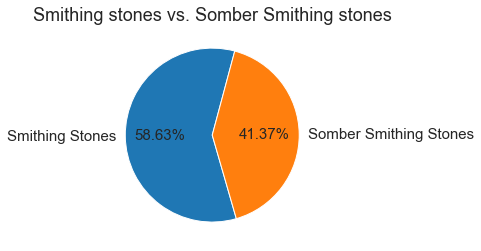

In [214]:
plt.figure(figsize=(8,4))
plt.title("Smithing stones vs. Somber Smithing stones")
plt.pie(top_stones, labels=top_stones.index, autopct='%1.2f%%', startangle=75);

With the stone Blacksmith Stones, weapons are improved more often, therefore blacksmith stones are more abundant, and if some arams have good improvement with this stone, they are good options.

<img src="https://oyster.ignimgs.com/mediawiki/apis.ign.com/elden-ring/7/76/Somber1.jpg" />

### Q5: What percentages of scalability do you have with strength ability between the categories?

In [145]:
df['Str'].unique()

array(['D', 'B', 'E', None, 'C', 'A', 'S'], dtype=object)

In [146]:
top_str = df.Str.value_counts()

In [147]:
top_str

D    110
C     98
B     47
E     31
A      4
S      1
Name: Str, dtype: int64

In [148]:
top_str = df.Str.value_counts(normalize=True).reset_index().rename(columns={'Str':'Count','index':'Str'})
top_str

,Str,Count
0,D,0.378007
1,C,0.336770
2,B,0.161512
3,E,0.106529
4,A,0.013746
5,S,0.003436


In [149]:
top_Categories_str =top_str.head(6).sort_values(by = ['Str'],ascending = True)

Text(0.5, 1.0, ' % Scalability with strength per category')

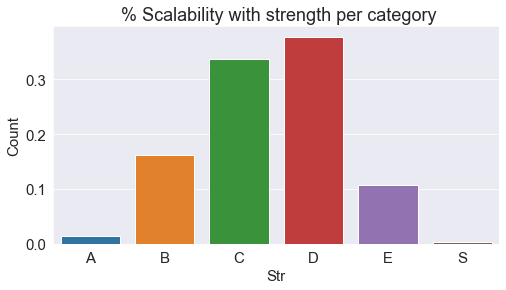

In [150]:
sns.barplot(x = top_Categories_str.Str ,y= top_Categories_str.Count)
plt.title(' % Scalability with strength per category')

The majority of weapons that scale with strength are category D followed by C, B, E, and the best would be A, and S, the latter being the rarest and best.

### Q5: What percentages of scalability do you have with dextrous ability between the categories?

In [151]:
df['Dex'].unique()

array([None, 'D', 'C', 'E', 'B'], dtype=object)

In [152]:
top_Dex = df.Dex.value_counts(normalize=True).reset_index().rename(columns={'Dex':'Count','index':'Dex'})
top_Dex

,Dex,Count
0,D,0.418251
1,C,0.304183
2,B,0.186312
3,E,0.091255


In [153]:
top_Categories_Dex =top_Dex.head(4).sort_values(by = ['Dex'],ascending = True)

Text(0.5, 1.0, ' % Scalability with Dextrous per category')

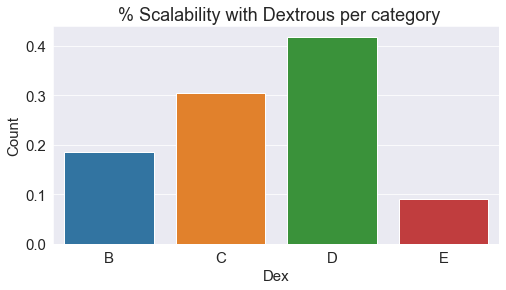

In [154]:
sns.barplot(x = top_Categories_Dex.Dex ,y= top_Categories_Dex.Count)
plt.title(' % Scalability with Dextrous per category')

Most of the weapons that scale right-handed are category D followed by C, B, E, and according to this data set there would be no weapons with scalability in A or S

### Q7: what percentage of weapons have the most common critical damage? 

In [155]:
df['Cri'].unique()

array([100, 110, 130, 115, 124, 140], dtype=int64)

In [156]:
top_cri = df.Cri.value_counts() 

In [157]:
top_cri= df.Cri.value_counts(normalize=True).reset_index().rename(columns={'Cri':'Count','index':'Cri'})
top_cri

,Cri,Count
0,100,0.912052
1,110,0.071661
2,130,0.006515
3,115,0.003257
4,124,0.003257
5,140,0.003257


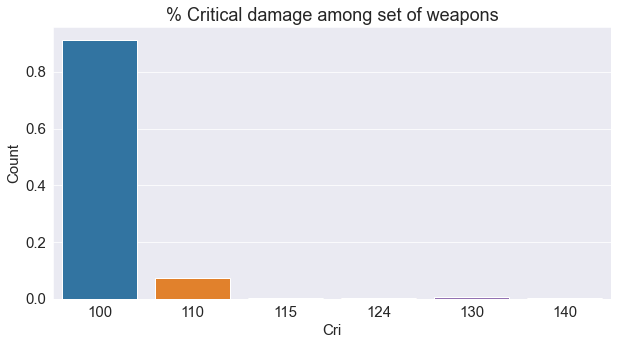

In [158]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=0)
plt.title("% Critical damage among set of weapons")
sns.barplot(y=top_cri.Count, x=top_cri.Cri);

The most common critical damage among weapons is
91.25% with 100, 7.16% with 110, and only about 1.6% of weapons have a critical damage of between 110<x<140 and those being the rarest and best.


### Q8:What kind of relationship is between weight and resistance? 

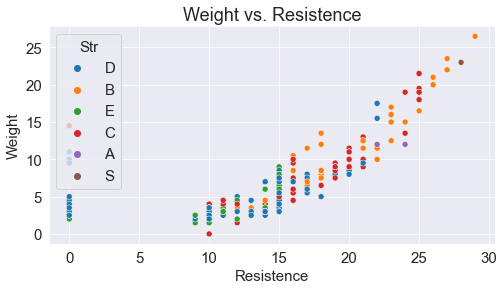

In [212]:
ax = sns.scatterplot(x="Rst", y="Wgt", data=df, hue='Str')
ax.set_title("Weight vs. Resistence")
ax.set_xlabel("Resistence")
ax.set_ylabel("Weight");

If you remove some atypical data you can see a correlation between the weight and resistance of weapons positive, which is a very interesting correlation when wanting to also have a lot of resistance.


## INFERENCES AND CONCLUSION




Starting elden ring focused on maximizing character builds with strength ability is a very good decision, as they have better weapons to be scaled, in addition to having a good range of physical damage, and thanks to the wide variety of weapons you can choose between 30 types of weapons, and if you want to have greater resistance you should choose one of the colossal weapons or if you do not seek high resistance katanas are for you,  if you like katanas it would be good to get the nagakiba, so it's easier to improve with the smithing stone, which are more abundant for the physical damage it has, or the uchigatana being the initial weapon of the samurai class, and you could get from it Initially a decent amount of physical damage.

## REFERENCES  

https://www.kaggle.com/datasets/l3llff/-elden-ring-weapons?select=elden_ring_weapon.csv

## FUTURE WORKS

* Try other ways to build a character.
* Try other data sets besides weapons
* Do web scraping and collect the raw data from other parts of the game, and do EDA

## ACKNOWLEDGMENT

Thanks for giving a view on my project. I hope you watched my entire analysis on Elden Ring Weapons EDA and get some knowledge from it. This Project is a part of the Course DATA ANALYSIS WITH PYTHON :ZERO_TO_PANDAS. I would like to express my gratitude to Aakash NS and the whole Jovian.ml team for giving me an Oppurtunity to make such an wonderful data exploratory project.